# Contents

**Cutoff Analysis for speeches length**

In [1]:
import pandas as pd
import numpy as np
import numpy as np
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')

#relabel model
from relabel_model import RuleBasedStanceDetection

#data preprocessing
import data_preprocessing

#plot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

** Load data and check data**

In [3]:
data = data_preprocessing.read_data('./data/data.csv')

In [4]:
train_corpus, test_corpus, train_labels, test_labels = data_preprocessing.split(data)

**Cutoff Analysis for speeches length**

check speech length distribution here

In [23]:
def cut_off_analysis_of_speech_length(min_cutoff,max_cutoff,train_corpus,test_corpus):
    '''
    divide speeches into 3 groups: 
    1. speeches whose length is less than or equals min_cutoff
    2. speeches whose length is more than max_cutoff
    3. speeches whose length is between the min_cutoff and the max_cutoff'''
    corpus =  train_corpus + test_corpus
    #length of short speeches, long speeches and speeches with normal length
    short_sentences = []
    long_sentences = []
    normal_sentences = []
    length = []
    #index of short and long sentences
    index_short_sentences = []
    index_long_sentences = []

    for i in tqdm(range(len(corpus))):
        li = word_tokenize(corpus[i])
        i_len = len(li)
        if i_len<min_cutoff:
            short_sentences.append(i_len)
            index_short_sentences.append(i)
        elif i_len>max_cutoff:
            long_sentences.append(i_len)
            index_long_sentences.append(i)
        else:
            normal_sentences.append(i_len)
    all_speeches = short_sentences + long_sentences + normal_sentences
    return all_speeches, normal_sentences, long_sentences, short_sentences, index_short_sentences, index_long_sentences

**small experiment 1:**

In [24]:
all_speeches_len, normal_s_len, long_s_len, short_s_len, idx_short_s, idx_long_s = cut_off_analysis_of_speech_length(5,5000,train_corpus,test_corpus)

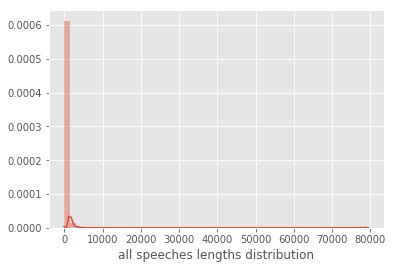

In [25]:
length = pd.Series(all_speeches_len)
sns.distplot(length,axlabel='all speeches lengths distribution') 
save_jpeg('./graphs','all_speeches_length_distribution')

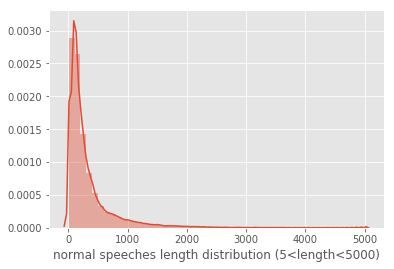

In [26]:
sns.distplot(normal_s_len,axlabel='normal speeches length distribution (5<length<5000)') 
save_jpeg('./graphs','speeches_with_normal_length_distribution (5<length<5000)')

**small experiment 2:**

In [28]:
all_speeches_len2, normal_s_len2, long_s_len2, short_s_len2, idx_short_s2, idx_long_s2 = cut_off_analysis_of_speech_length(10,2000,train_corpus,test_corpus)

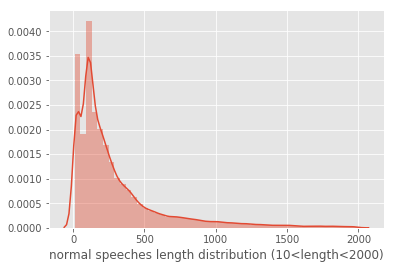

In [36]:
sns.distplot(normal_s_len2,axlabel='normal speeches length distribution (10<length<2000)') 
save_jpeg('./graphs','speeches_with_normal_length_distribution (10<length<2000)')

**small experiment 3**

In [30]:
all_speeches_len3, normal_s_len3, long_s_len3, short_s_len3, idx_short_s3, idx_long_s3 = cut_off_analysis_of_speech_length(10,1000,train_corpus,test_corpus)

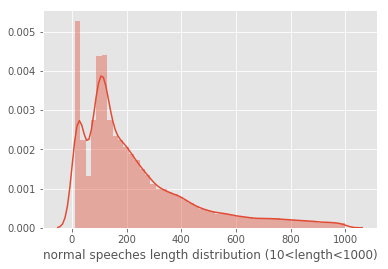

In [34]:
sns.distplot(normal_s_len3,axlabel='normal speeches length distribution (10<length<1000)') 
save_jpeg('./graphs','speeches_with_normal_length_distribution (10<length<1000)')